### [마법의 엘리베이터](https://school.programmers.co.kr/learn/courses/30/lessons/148653)

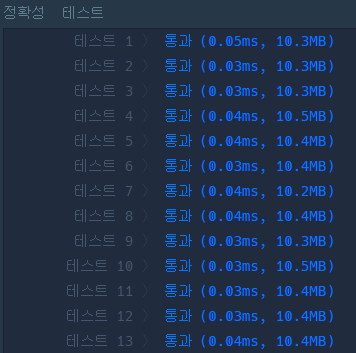

In [41]:
def solution(storey):
    answer = 0
    storey = str(storey)
    i = 0
    while True:
        i += 1
        N = len(storey)
        if i == N+1:
            break
        target = int(storey[-i])
        if target < 5 or i == N:
            answer += min(target, 11-target)
        elif target > 5:
            storey = str(int(storey[:-i]) + 1) + storey[-i:]
            answer += 10 - target
        elif target == 5:                
            for j in range(i+1, len(storey)+1):
                n_target = int(storey[-j])
                if n_target >= 5:
                    # print(f'{j=}, {storey=}')
                    storey = str(int(storey[:-i]) + 1) + storey[-i:]
                    break
                elif n_target < 5:
                    break
            answer += 5
        # print(f'{storey=}, {answer=}')
    return answer

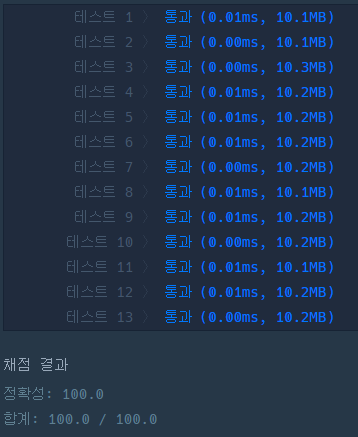

In [132]:
def solution(storey):
    answer = 0
    while storey > 0:
        storey, moves = divmod(storey, 10) # 뒤에서부터 카운트
        if moves > 5 or (moves == 5 and storey % 10 >= 5): # 숫자를 올리는게 최적인 경우
            moves = 10 - moves
            storey += 1
        answer += moves
    return answer

In [123]:
from collections import deque

def solution(storey):
    queue = deque([(storey, 1, 0)]) # (number, step, answer)
    high = 10 ** len(str(storey)) + 1
    history = [False] * high
    history[storey] = False
    while queue:
        num, step, answer = queue.popleft()
        
        if step == len(str(num)):
            
        target = int(str(num)[-step])
        
        # plus
        cnt = 10 - target
        new = num + cnt
        value = answer + cnt
        if 0 <= new < high and (not history[new] or value < history[new]) :
            print("\nplus", new)
            history[new] = value
            if step < len(str(new)):
                queue.append((new, step+1, value))
                    
        # minus
        cnt = target
        new = num - cnt
        value = answer + cnt
        if 0 <= new < high and (not history[new] or value < history[new]) :
            print("minus", new)
            history[new] = value
            if step < len(str(new)):
                queue.append((new, step+1, value))

    return history[1560]

In [124]:
solution(1555)


plus 1560
minus 1550

plus 1564
minus 1554

plus 1555
minus 1545

plus 1569
minus 1559
minus 1549
minus 1540

plus 1578
minus 1568
minus 1558
minus 1548
minus 1539


5

### [숫자 카드 나누기](https://school.programmers.co.kr/learn/courses/30/lessons/135807)

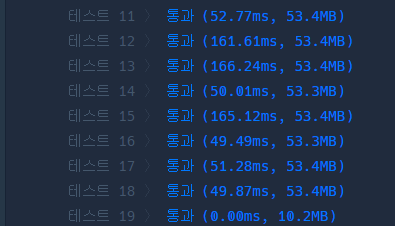

In [41]:
# 유클리드 호제법을 이용해 최대 공약수 구하기
def gcd(a, b):
    while b:
        a, b = b, a % b
    return a

def solution(arrayA, arrayB):
    lenA, lenB = len(arrayA), len(arrayB)
    
    # arrayA의 최대공약수를 구하고, 이를 이용해 리스트 안의 값들을 나눌 수 있는 최대값 구하기
    gcdA = gcd(arrayA[0], arrayA[1]) if lenA > 1 else arrayA[0]
    gcdB = gcd(arrayB[0], arrayB[1]) if lenB > 1 else arrayB[0]

    max_gcd = max(gcdA, gcdB)
    if max_gcd > 1:
        
        sampleA, sampleB = arrayA[0], arrayB[0]
        for i in range(max_gcd, 1, -1):
            if sampleA % i == 0 or sampleB % i == 0:
                checkA = len([x%i for x in arrayA if x%i == 0])
                checkB = len([y%i for y in arrayB if y%i == 0])           

                if (checkA==lenA and not checkB) or (checkB==lenB and not checkA):
                    return i
                
    return 0

- reduce 함수를 이용해 한 번에 리스트 내 모든 함수들의 최대 공약수를 구해버리기

In [53]:
from functools import reduce

# 유클리드 호제법을 이용해 최대 공약수 구하기
def gcd(a, b):
    while b:
        a, b = b, a % b
    return a

def solution(arrayA, arrayB):    
    gcdA, gcdB = reduce(gcd, arrayA), reduce(gcd, arrayB)
    
    answer = 0
    if all(x%gcdB for x in arrayA):
        answer = gcdB
    if all(y%gcdA for y in arrayB):
        answer = max(answer, gcdA)  
    
    return answer

- 유클리드 호제법을 이용한 최대공약수 함수도 math 모듈에서 불러오기

In [46]:
from functools import reduce
from math import gcd

def solution(nums1, nums2):
    gcd1, gcd2 = reduce(gcd, nums1), reduce(gcd, nums2)
    answer = 0
    if all(x % gcd2 for x in nums1):
        answer = gcd2
    if all(y % gcd1 for y in nums2):
        answer = gcd1 if gcd1 > answer else answer
    return answer

In [49]:
arrayA = [4, 8, 16]
reduce(gcd, arrayA)

4

In [54]:
arrayA = [5]
arrayB = [8]
solution(arrayA, arrayB)

8

In [52]:
arrayA = [9, 17]
arrayB = [10, 20]
solution(arrayA, arrayB)

0

In [18]:
def gcd(a, b):
    while b:
        print(f'\nbefore:{a=}, {b=}')
        a, b = b, a % b
        print(f'after:{a=}, {b=}')
    return a

# 예시 사용
num1 = 48
num2 = 18

result = gcd(num1, num2)
print(f"{num1}와 {num2}의 최대 공약수는 {result}입니다.")


before:a=48, b=18
after:a=18, b=12

before:a=18, b=12
after:a=12, b=6

before:a=12, b=6
after:a=6, b=0
48와 18의 최대 공약수는 6입니다.


In [20]:
def gcd(a, b):
    while b:
        a, b = b, a % b
    return a

def find_all_divisors(n):
    divisors = []
    for i in range(1, n + 1):
        if n % i == 0:
            divisors.append(i)
    return divisors

def common_divisors(num1, num2):
    gcd_value = gcd(num1, num2)
    return find_all_divisors(gcd_value)

# 예시 사용
num1 = 48
num2 = 18
divisors = common_divisors(num1, num2)

print(f"{num1}와 {num2}를 모두 나눌 수 있는 숫자들은 {divisors}입니다.")


48와 18를 모두 나눌 수 있는 숫자들은 [1, 2, 3, 6]입니다.


### [시소 짝꿍](https://school.programmers.co.kr/learn/courses/30/lessons/152996)

- 핵심은 제한사항 중 데이터의 범위를 잘 보는 것.  
  구체적으로 wieghts의 길이는 최대 100,000으로 아주 길 수 있지만, 그렇게 구현된 wieghts의 범위는 100~1000으로 901개밖에 되지 않으므로,  
  이를 고려해 가능한 경우의 수를 제한하고, 제한된 범위 안에서 작업함으로써 문제를 푸는 식으로 진행  

In [69]:
from collections import Counter

def solution(weights):
    counter = Counter(weights)
    answer = 0

    for c in counter:
        if counter[c] > 0:
            # 자기 자신과 동일 -> 같은 거리에 앉아야함
            answer += counter[c] * (counter[c] - 1) // 2 # nC2 n!/2!(n - 2)!
            # 두 명이 앉는 경우의 수 -> 다른 거리에 앉아야함
            answer += counter[c] * counter[c * 4 / 3] # 4m & 3m
            answer += counter[c] * counter[c * 4 / 2] # 4m & 2m
            answer += counter[c] * counter[c * 3 / 2] # 3m & 2m

    return answer

In [70]:
weights = [100,100,150, 150]
solution(weights)

6

In [71]:
weights = [100,180,360,100,270]
solution(weights)

4

### [메뉴 리뉴얼](https://school.programmers.co.kr/learn/courses/30/lessons/72411)

In [109]:
from itertools import combinations

def solution(orders, course):
    menu = {}
    answer = []
    for c in course:
        for order in orders:
            subset = ["".join(sorted(x)) for x in combinations(order, c)]
            for sub in subset:
                if sub in menu.keys():
                    menu[sub] += 1
                else :
                    menu[sub] = 1
        if menu:
            max_c = max(max(menu.values()), 2)
            answer += [k for k, v in menu.items() if v == max_c]
            menu = {}
    answer.sort()
    return answer

In [110]:
orders = ["ABCFG", "AC", "CDE", "ACDE", "BCFG", "ACDEH"]
course = [2,3,4]
solution(orders, course)

['AC', 'ACDE', 'BCFG', 'CDE']

In [111]:
orders = ["ABCDE", "AB", "CD", "ADE", "XYZ", "XYZ", "ACD"]
course = [2,3,5]
solution(orders, course)

['ACD', 'AD', 'ADE', 'CD', 'XYZ']

In [112]:
orders = ["XYZ", "XWY", "WXA"]
course = [2,3,4]
solution(orders, course)

['WX', 'XY']

### [무인도 여행](https://school.programmers.co.kr/learn/courses/30/lessons/154540)

- BFS

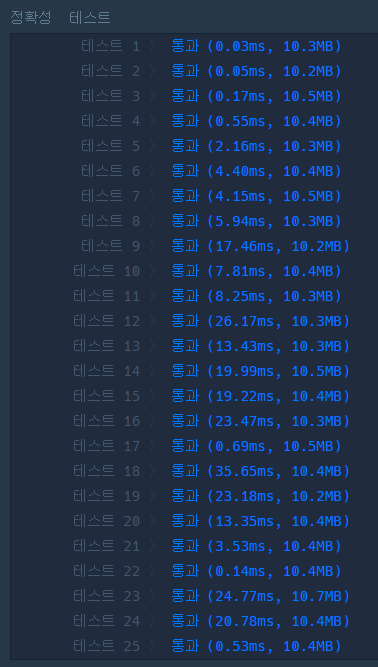

In [29]:
from collections import deque

def solution(maps):
    history = [[False] * len(maps[0]) for _ in range(len(maps))]
    directions = [(1,0), (0,1), (-1,0), (0, -1)]
    
    answers = []
    for y in range(len(maps)):
        for x in range(len(maps[0])):
            for dx, dy in directions:
                nx, ny = x+dx, y+dy
                if 0 <= nx < len(maps[0]) and 0 <= ny < len(maps) and not history[ny][nx] and maps[ny][nx] != 'X':
                    history[ny][nx] = True
                    answer = int(maps[ny][nx])
                    queue = deque([(nx, ny)])
                    while queue:
                        nx, ny = queue.popleft()
                        for dx, dy in directions:
                            mx, my = nx+dx, ny+dy
                            if 0 <= mx < len(maps[0]) and 0 <= my < len(maps) and not history[my][mx] and maps[my][mx] != 'X':
                                history[my][mx] = True
                                answer += int(maps[my][mx])                     
                                queue.append((mx, my))

                    answers.append(answer)
    
    if not answers:
        return [-1]
    return sorted(answers)

- DFS

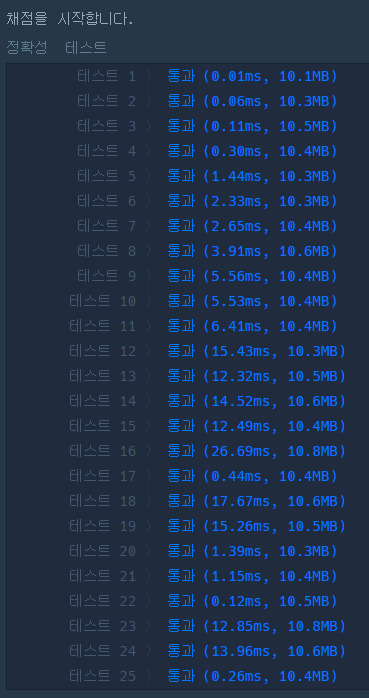

In [ ]:
def solution(maps):

    def dfs(x, y):
        stack = [(x, y)]
        food_sum = 0
        
        while stack:
            x, y = stack.pop()
            if 0 <= x < len(maps) and 0 <= y < len(maps[0]) and not visited[x][y] and maps[x][y] != 'X':
                visited[x][y] = True
                food_sum += int(maps[x][y])
                
                # 상, 하, 좌, 우 방향으로 이동
                for dx, dy in [(-1, 0), (1, 0), (0, -1), (0, 1)]:
                    stack.append((x + dx, y + dy))
        
        return food_sum

    visited = [[False] * len(maps[0]) for _ in range(len(maps))]
    islands = []

    for i in range(len(maps)):
        for j in range(len(maps[0])):
            if maps[i][j] != 'X' and not visited[i][j]:
                food = dfs(i, j)
                if food > 0:
                    islands.append(food)

    if not islands:
        return [-1]
    
    return sorted(islands)

In [30]:
maps = ["X591X","X1X5X","X231X", "1XXX1"]
solution(maps)

[1, 1, 27]

### 2018 KAKAO BLIND RECRUITMENT > [방금그곡](https://school.programmers.co.kr/learn/courses/30/lessons/17683)

- 문제가 안좋음
- 문제에 제시되지 않음 음('B#')이 테스트 케이스에 존재

In [50]:
from collections import deque
from datetime import datetime
import math

def time_difference(time1, time2):
    format = "%H:%M"
    time1 = datetime.strptime(time1, format)
    time2 = datetime.strptime(time2, format)
    
    # 시간 차이를 분 단위로 계산
    difference = (time2 - time1).total_seconds() / 60
    
    return int(abs(difference))

def solution(m, musicinfos):
    musicinfos = deque(musicinfos)
    musics = {}
    tunes = {'C#':'H',
             'D#':'I', 
             'F#':'J', 
             'G#':'K',
             'A#':'L',
             'B#':'M'}
    if '#' in m:
        for tune in tunes:
            m = m.replace(tune, tunes[tune])

    while musicinfos:
        s_time, e_time, name, music = musicinfos.popleft().split(",")
        if '#' in music:
            for tune in tunes:
                music = music.replace(tune, tunes[tune])
        play_time = time_difference(s_time, e_time)
        duration = math.ceil(play_time / len(music))
        music = (music * duration)[:play_time]
        musics[name] = [music, play_time]
    answer = []
    for name, [melody, play_time] in musics.items():
        if m in melody:
            answer.append((name, play_time))
    print(answer)
    if len(answer) == 0:
        return "(None)"
    elif len(answer) == 1:
        return answer[0][0]
    else :
        return sorted(answer, key=lambda x:-x[1])[0][0]

In [52]:
'ABCDABCD'.replace('A', 'H')

'HBCDHBCD'

In [51]:
m = "ABC"
musicinfos = ["12:00,12:14,HELLO,C#DEFGAB", "13:00,13:05,WORLD,ABCDEF"]
solution(m, musicinfos)

[('WORLD', 5)]


'WORLD'

### [배달](https://school.programmers.co.kr/learn/courses/30/lessons/12978)

In [1]:
from collections import deque

def solution(N, road, K):
    big_one = 1_000_000_000
    history = [big_one]*(N+1)
    maps = [[big_one]*(N+1) for _ in range((N+1))]
    for f,t,d in road:
        if d < maps[f][t]:
            maps[f][t] = d
            maps[t][f] = d
    
    queue = deque([(1, 0)]) # 현재 위치, 거리
    answer = [1]
    while queue:
        cur, dist = queue.popleft()
        for i in range(2, N+1):
            if i == cur:
                continue
            ndist = dist + maps[cur][i]
            if maps[cur][i] > 0 and (ndist < history[i]):
                history[i] = ndist
                queue.append((i, ndist))
                if ndist <= K:
                    answer.append(i)

    return len(list(set(answer)))

In [2]:
N = 6
road = [1,2,1],[1,3,2],[2,3,2],[3,4,3],[3,5,2],[3,5,3],[5,6,1]
K = 4
solution(N, road,K)

4

In [3]:
N = 5
road = [[1,2,1],[2,3,3],[5,2,2],[1,4,2],[5,3,1],[5,4,2]]
K = 3
solution(N, road,K)

4